In [56]:
movie = pd.read_csv('./datas/final_movie_Rev5.csv', index_col=[0])
movie.reset_index(drop=True, inplace=True)
movie

,Movie,Distributor,Screen,Sales,Audience,Genre,Rate,Year,Month,Season,...,라미란,조진웅,김기천,한이진,오정세,CJEnM,LotteShop,Next,ShowBox,CJEnt
0,명량,씨제이이앤엠(주),1587,135748.398910,17613682,사극,15세이상관람가,2014,7,3,...,0,1,0,1,0,1,0,0,0,0
1,극한직업,씨제이이앤엠(주),1978,139647.979516,16264944,코미디,15세이상관람가,2019,1,1,...,0,0,0,0,1,1,0,0,0,0
2,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,1912,115698.654137,14410754,판타지,12세이상관람가,2017,12,1,...,0,0,0,0,0,0,1,0,0,0
3,국제시장,씨제이이앤엠(주),966,110828.014630,14245998,드라마,12세이상관람가,2014,12,1,...,1,0,0,0,0,1,0,0,0,0
4,베테랑,씨제이이앤엠(주),1064,105024.756250,13395400,액션,15세이상관람가,2015,8,3,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,은교,롯데쇼핑㈜롯데엔터테인먼트,521,9917.728000,1346274,멜로/로맨스,청소년관람불가,2012,4,2,...,0,0,0,0,0,0,1,0,0,0
807,마담 뺑덕,씨제이이앤엠(주),536,3685.882590,465749,멜로/로맨스,청소년관람불가,2014,10,4,...,0,0,0,0,0,1,0,0,0,0
808,나의 PS 파트너,씨제이이앤엠(주),552,13845.218616,1823116,멜로/로맨스,청소년관람불가,2012,12,1,...,0,0,0,0,0,1,0,0,0,0
809,연애의 온도,롯데쇼핑㈜롯데엔터테인먼트,567,13798.864446,1865195,멜로/로맨스,청소년관람불가,2013,3,2,...,1,0,0,0,0,0,1,0,0,0


In [57]:
movie['log_sales'] = np.log1p(movie['Sales'])

### 1. 라벨 인코딩

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
movie['Rate'] = labelencoder.fit_transform(movie['Rate'])
movie['genre_encoded'] = labelencoder.fit_transform(movie['Genre'])

In [60]:
# movie['log_sales'] = round(np.log1p(movie['Sales']), 3)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

In [62]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          811 non-null    object 
 1   Distributor    811 non-null    object 
 2   Screen         811 non-null    int64  
 3   Sales          811 non-null    float64
 4   Audience       811 non-null    int64  
 5   Genre          811 non-null    object 
 6   Rate           811 non-null    int32  
 7   Year           811 non-null    int64  
 8   Month          811 non-null    int64  
 9   Season         811 non-null    int64  
 10  이경영            811 non-null    int64  
 11  정인기            811 non-null    int64  
 12  마동석            811 non-null    int64  
 13  배성우            811 non-null    int64  
 14  오달수            811 non-null    int64  
 15  라미란            811 non-null    int64  
 16  조진웅            811 non-null    int64  
 17  김기천            811 non-null    int64  
 18  한이진       

In [63]:
numerics = ['int64', 'float64', 'int32']
movie_df = movie.select_dtypes(include=numerics)

In [64]:
X = movie_df.drop(['Sales', 'Audience', 'log_sales'], axis=1)
y = movie_df['log_sales']

In [65]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [66]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  1.3656379148611897
RMSE of Test Data :  1.4975226874758927


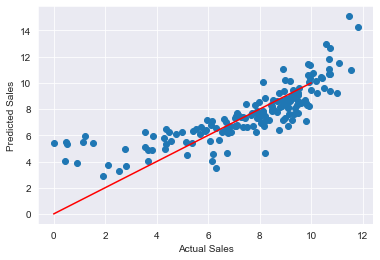

In [68]:
sns.set_style('darkgrid')
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([0,10], [0,10], 'r');

In [69]:
corr_matrix = movie.corr()
corr_matrix['Sales'].sort_values(ascending=False).head(11)

Sales            1.000000
Audience         0.996963
Screen           0.696910
log_sales        0.601955
오달수              0.283860
CJEnM            0.246143
ShowBox          0.189446
마동석              0.184736
한이진              0.151183
이경영              0.146110
genre_encoded    0.142903
Name: Sales, dtype: float64

### 2. 원핫 인코딩

In [71]:
movie = pd.read_csv('./datas/final_movie_Rev5.csv', index_col=[0])
movie.reset_index(drop=True, inplace=True)

In [72]:
movie = pd.concat([movie, pd.get_dummies(movie['Rate'], prefix='rate')], axis=1)
movie.drop(['Rate'], axis=1, inplace=True)
movie = pd.concat([movie, pd.get_dummies(movie['Genre'], prefix='genre')], axis=1)
movie.drop(['Genre'], axis=1, inplace=True)
movie = pd.concat([movie, pd.get_dummies(movie['Season'], prefix='season')], axis=1)
movie.drop(['Season'], axis=1, inplace=True)
movie = pd.concat([movie, pd.get_dummies(movie['Year'], prefix='year')], axis=1)
movie.drop(['Year'], axis=1, inplace=True)
movie = pd.concat([movie, pd.get_dummies(movie['Month'], prefix='month')], axis=1)
movie.drop(['Month'], axis=1, inplace=True)
# movie = pd.get_dummies(movie, columns=['Rate', 'Genre', 'Season', 'Year', 'Month'])

In [73]:
movie['log_sales'] = np.log1p(movie['Sales'])

In [21]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 810
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           797 non-null    object 
 1   Distributor     797 non-null    object 
 2   Screen          797 non-null    int64  
 3   Sales           797 non-null    float64
 4   Audience        797 non-null    int64  
 5   이경영             797 non-null    int64  
 6   정인기             797 non-null    int64  
 7   마동석             797 non-null    int64  
 8   배성우             797 non-null    int64  
 9   오달수             797 non-null    int64  
 10  라미란             797 non-null    int64  
 11  조진웅             797 non-null    int64  
 12  김기천             797 non-null    int64  
 13  한이진             797 non-null    int64  
 14  오정세             797 non-null    int64  
 15  CJEnM           797 non-null    int64  
 16  LotteShop       797 non-null    int64  
 17  Next            797 non-null    int

In [40]:
for col in movie.columns:
    print(col)

Movie
Distributor
Screen
Sales
Audience
이경영
정인기
마동석
배성우
오달수
라미란
조진웅
김기천
한이진
오정세
CJEnM
LotteShop
Next
ShowBox
CJEnt
rate_12세이상관람가
rate_15세이상관람가
rate_18세관람가
rate_전체관람가
rate_청소년관람불가
genre_SF
genre_가족
genre_공연
genre_공포(호러)
genre_기타
genre_다큐멘터리
genre_드라마
genre_멜로/로맨스
genre_뮤지컬
genre_미스터리
genre_범죄
genre_사극
genre_서부극(웨스턴)
genre_스릴러
genre_애니메이션
genre_액션
genre_어드벤처
genre_전쟁
genre_코미디
genre_판타지
season_1
season_2
season_3
season_4
year_2008
year_2009
year_2010
year_2011
year_2012
year_2013
year_2014
year_2015
year_2016
year_2017
year_2018
year_2019
month_1
month_2
month_3
month_4
month_5
month_6
month_7
month_8
month_9
month_10
month_11
month_12


In [166]:
movie.to_csv('./datas/final_movie_Rev6.csv')

In [74]:
numerics = ['int64', 'float64', 'uint8']
movie_df = movie.select_dtypes(include=numerics)

In [75]:
X = movie_df.drop(['Sales', 'Audience', 'log_sales'], axis=1)
y = movie_df['log_sales']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [77]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  1.3267877494372937
RMSE of Test Data :  1.454716540897158


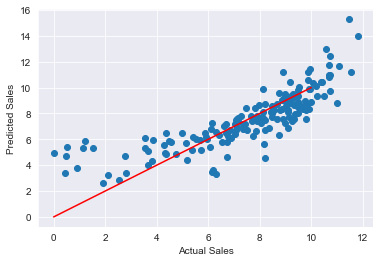

In [78]:
sns.set_style('darkgrid')
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([0,10], [0,10], 'r');

In [79]:
corr_matrix = movie.corr()
corr_matrix['Sales'].sort_values(ascending=False).head(11)

Sales        1.000000
Audience     0.996963
Screen       0.696910
log_sales    0.601955
오달수          0.283860
CJEnM        0.246143
ShowBox      0.189446
마동석          0.184736
genre_사극     0.158976
한이진          0.151183
genre_액션     0.150214
Name: Sales, dtype: float64

### 3. 원핫인코딩 + 아웃라이어 제거

In [80]:
movie = pd.read_csv('./datas/final_movie_Rev6.csv', index_col=[0])
movie.reset_index(drop=True, inplace=True)
movie

,Movie,Distributor,Screen,Sales,Audience,이경영,정인기,마동석,배성우,오달수,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,명량,씨제이이앤엠(주),1587,135748.398910,17613682,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,극한직업,씨제이이앤엠(주),1978,139647.979516,16264944,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,1912,115698.654137,14410754,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,국제시장,씨제이이앤엠(주),966,110828.014630,14245998,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,베테랑,씨제이이앤엠(주),1064,105024.756250,13395400,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,은교,롯데쇼핑㈜롯데엔터테인먼트,521,9917.728000,1346274,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
807,마담 뺑덕,씨제이이앤엠(주),536,3685.882590,465749,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
808,나의 PS 파트너,씨제이이앤엠(주),552,13845.218616,1823116,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
809,연애의 온도,롯데쇼핑㈜롯데엔터테인먼트,567,13798.864446,1865195,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
movie['log_sales'] = np.log1p(movie['Sales'])

In [82]:
fraud = movie['log_sales']
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index, len(outlier_index)

(Int64Index([745, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775,
             776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788,
             789, 790, 791, 792, 793],
            dtype='int64'),
 31)

In [83]:
movie.drop(outlier_index, axis=0, inplace=True)

In [84]:
numerics = ['int64', 'float64', 'uint8']
movie_df = movie.select_dtypes(include=numerics)

X = movie_df.drop(['Sales', 'Audience', 'log_sales'], axis=1)
y = movie_df['log_sales']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [86]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  1.084393876709409
RMSE of Test Data :  1.136275998748787


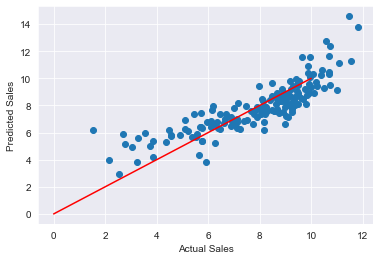

In [87]:
sns.set_style('darkgrid')
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([0,10], [0,10], 'r');

In [211]:
corr_matrix = movie.corr()
corr_matrix['Sales'].sort_values(ascending=False).head(11)

Sales       1.000000
Audience    0.995071
Screen      0.693766
ShowBox     0.207234
CJEnM       0.190208
genre_범죄    0.183692
라미란         0.134537
genre_사극    0.132899
마동석         0.109110
조진웅         0.098013
한이진         0.096157
Name: Sales, dtype: float64

### 4. 아웃라이어 제거 한 번 더

In [88]:
fraud = movie['log_sales']
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index

Int64Index([708, 744, 747, 748, 752, 753, 754, 755, 756, 758, 759, 760, 761,
            762, 763],
           dtype='int64')

In [89]:
movie.drop(outlier_index, axis=0, inplace=True)

In [90]:
numerics = ['int64', 'float64', 'uint8']
movie_df = movie.select_dtypes(include=numerics)

X = movie_df.drop(['Sales', 'Audience', 'log_sales'], axis=1)
y = movie_df['log_sales']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [92]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  0.9772095490526641
RMSE of Test Data :  1.0959004075643322


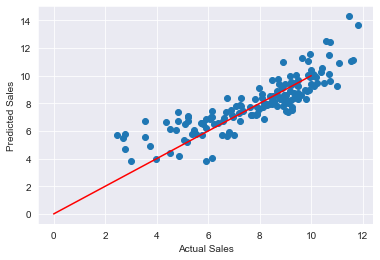

In [93]:
sns.set_style('darkgrid')
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([0,10], [0,10], 'r');

In [94]:
corr_matrix = movie.corr()
corr_matrix['log_sales'].sort_values(ascending=False).head(11)

log_sales        1.000000
Screen           0.762471
Audience         0.666190
Sales            0.661716
CJEnM            0.241363
ShowBox          0.191418
rate_15세이상관람가    0.172966
genre_범죄         0.165700
genre_사극         0.148048
오달수              0.143803
Next             0.143056
Name: log_sales, dtype: float64

In [38]:
movie

,Movie,Distributor,Screen,Sales,Audience,이경영,정인기,마동석,배성우,오달수,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
103,감기,아이러브시네마,806,21784.202000,3119023,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
104,하모니,씨제이엔터테인먼트,405,21992.266198,3068544,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,거북이 달린다,(주)쇼박스,379,20857.347292,3059812,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
108,마더,씨제이엔터테인먼트,648,20195.373838,3013523,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
109,오싹한 연애,씨제이이앤엠(주),469,21965.313000,3001530,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,은교,롯데쇼핑㈜롯데엔터테인먼트,521,9917.728000,1346274,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
809,마담 뺑덕,씨제이이앤엠(주),536,3685.882590,465749,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
810,나의 PS 파트너,씨제이이앤엠(주),552,13845.218616,1823116,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
811,연애의 온도,롯데쇼핑㈜롯데엔터테인먼트,567,13798.864446,1865195,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
